로지스틱(Logistic) 회귀분석은 그 명칭과 달리 회귀분석 문제와 분류문제 모두에 사용할 수 있다. 

#### 로지스틱 회귀분석 모형에서는 종속변수가 이항 분포를 따르고 그 모수  𝜇 가 독립 변수  𝑥 에 의존한다고 가정한다.

$$p(y \mid x) = \text{Bin} (y; \mu(x), N)$$

위 식에서 보듯이 로지스틱함수는  𝑦 의 값이 특정한 구간내의 값( 0∼𝑁 )만 가질 수 있기 때문에 종속변수가 이러한 특성을 가진 경우에 회귀분석 방법으로 쓸 수 있다.

#### 또는 이항 분포의 특별한 경우( 𝑁=1 )로  𝑦 가 베르누이 확률분포인 경우도 있을 수 있다. 여기에서는 베르누이 확률분포를 따르는 로지스틱 회귀분석만 고려하기로 한다.

$$p(y \mid x) = \text{Bern} (y; \mu(x) )$$

종속변수  𝑦 가 0또는 1인 분류 예측 문제를 풀 때는  𝑥  값에 따라  𝜇(𝑥) 를 예측한 후 다음 기준에 따라 y를 예측한다.

$$\hat{y} = \begin{cases} 1 & \text{ if } \mu(x) \geq 0.5 \\ 0 & \text{ if } \mu(x) < 0.5 \end{cases}$$

또는  𝑦̂  로  𝑦=1 이 될 확률값  𝜇(𝑥) 를 직접 출력할 수도 있다.

$$\hat{y} = \mu(x)$$

## 시그모이드함수

로지스틱 회귀모형에서는 베르누이 확률분포의 모수  𝜇 가 x의 함수라고 가정한다.  

#### 𝜇(𝑥) 는 x에 대한 선형함수를 0부터 1사이의 값만 나올 수 있도록 시그모이드함수(sigmoid function)라는 함수를 사용하여 변형한 것을 사용한다.

$$\mu = f(w^Tx)$$

모수  𝜇 는 일반적인 회귀분석의 종속변수와 달리 0 부터 1까지의 실수값만 가질 수 있기 때문에 시그모이드함수이라 불리는 특별한 형태의 함수  𝑓 를 사용해야 한다. 시그모이드함수는 종속변수의 모든 실수 값에 대해

+ 유한한 구간  (𝑎,𝑏)  사이의 한정된(bounded) 값과
+ 항상 양의 기울기를 가지는 (단조증가)

함수의 집합을 말한다. 실제로는 다음과 같은 함수들이 주로 사용된다.

+ 로지스틱(Logistic)함수

$$\text{logitstic}(z) = \sigma(z) = \dfrac{1}{1+\exp{(-z)}}$$

+ 하이퍼볼릭탄젠트(Hyperbolic tangent)함수

$$\tanh(z) = \frac{\sinh z}{\cosh z} = \frac{(e^z - e^{-z})/2}{(e^z + e^{-z})/2} = 2 \sigma(2z) - 1$$

+ 오차(Error)함수

$$\text{erf}(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt$$

In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 13

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

import warnings
warnings.filterwarnings(action='ignore')

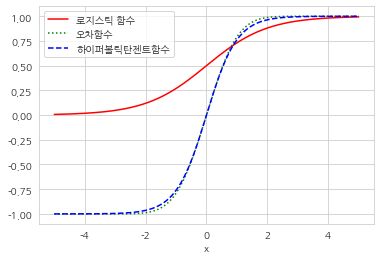

In [2]:
import scipy as sp

xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="로지스틱 함수")
plt.plot(xx, sp.special.erf(0.5 * np.sqrt(np.pi) *xx), 'g:', label="오차함수")
plt.plot(xx, np.tanh(xx), "b--", label="하이퍼볼릭탄젠트함수")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()

## 로지스틱함수

로지스틱함수는 무한대의 실수값을 0부터 1사이의 실수값을 1대1 대응시키는 시그모이드함수다. 다음 과정을 통해 정의되었다.

베르누이 시도에서 1이 나올 확률  𝜇  과 0이 나올 확률  1−𝜇  의 비(ratio)는 다음과 같은 수식이 되며 이를 승산비(odds ratio)라고 한다.

$$\text{odds ratio} = \dfrac{\mu}{1-\mu}$$

#### 0부터 1사이의 값만 가지는  𝜇 를 승산비로 변환하면 0부터  ∞ 의 값을 가질 수 있다.

승산비를 로그 변환한 것이 로지트함수(Logit function)다.

$$z = \text{logit}(\text{odds ratio}) = \log \left(\dfrac{\mu}{1-\mu}\right)$$

로지트함수의 값은 로그 변환에 의해  −∞ 부터  ∞ 까지의 값을 가질 수 있다.

#### 로지스틱함수(Logistic function)는 로지트함수의 역함수이다. 즉  −∞ 부터  ∞ 까지의 값을 가지는 변수를 0부터 1사의 값으로 변환한 결과이다.

$$\text{logitstic}(z) = \mu(z) = \dfrac{1}{1+\exp{(-z)}}$$

## 선형 판별함수

로지스틱함수  𝜎(𝑧) 를 사용하는 경우에는  𝑧 값과  𝜇 값은 다음과 같은 관계가 있다.

+ 𝑧 = 0 일 때  𝜇 = 0.5 
+ 𝑧 > 0 일 때  𝜇 > 0.5 → 𝑦̂ = 1 
+ 𝑧 < 0 일 때  𝜇 < 0.5 → 𝑦̂ = 0

#### 즉  𝑧 가 분류 모형의 판별함수(decision function)의 역할을 한다.

$$z = w^Tx$$

에서 로지스틱 회귀모형의 영역 경계면은 선형이라는 것을 알 수 있다.

## 로지스틱 회귀분석 모형의 모수 추정

로지스틱 회귀분석 모형은 일종의 비선형 회귀모형이지만 다음과 같이 최대가능도(Maximum Likelihood Estimation, MLE)방법으로 모수  𝑤 를 추정할 수 있다.

$$p(y \mid x) = \text{Bern} (y;\mu(x;w) ) = \mu(x;w)^y ( 1 - \mu(x;w) )^{1-y}$$

𝜇 를 로지스틱함수 형태로 표현하면 다음과 같다.

$$\mu(x;w) = \dfrac{1}{1 + \exp{(-w^Tx)}}$$

즉,

\begin{eqnarray}
p(y \mid x) 
&=& \left(  \dfrac{1}{1 + \exp{(-w^Tx)}} \right) ^y \left(  1 - \dfrac{1}{1 + \exp{(-w^Tx)}} \right) ^{1-y} \\
&=& \left(  \dfrac{1}{1 + \exp{(-w^Tx)}} \right) ^y \left( \dfrac{\exp{(-w^Tx)}}{1 + \exp{(-w^Tx)}} \right) ^{1-y} \\
\end{eqnarray}

데이터 표본이  {𝑥𝑖,𝑦𝑖}1:𝑁 일 경우 로그가능도  LL  를 구하면 다음과 같다.

베르누이 확률분포의 정의에서

$$\begin{eqnarray}
\text{LL} 
&=& \log \prod_{i=1}^N \mu(x_i;w)^{y_i} (1-\mu(x_i;w))^{1-y_i} \\
&=& \sum_{i=1}^N \left( y_i \log\mu(x_i;w) +  (1-y_i)\log(1-\mu(x_i;w)) \right) \\
&=& \sum_{i=1}^N \left( y_i \log\left(\dfrac{1}{1 + \exp{(-w^Tx_i)}}\right) + (1-y_i)\log\left(\dfrac{\exp{(-w^Tx_i)}}{1 + \exp{(-w^Tx_i)}}\right) \right) \\
\end{eqnarray}$$

가 된다.

로그가능도를 최대화하는  𝑤  값을 구하기 위해 다음과 같이 미분을 한다.

$$\dfrac{\partial\text{LL}}{\partial w}  = \sum_{i=1}^N \dfrac{\partial\text{LL}}{\partial \mu(x_i;w)} \dfrac{\partial\mu(x_i;w)}{\partial w}$$

우선  𝜇 를  𝑤 로 미분하면

$$\dfrac{\partial \mu(x_i;w)}{\partial w} 
= \dfrac{\partial}{\partial w} \dfrac{1}{1 + \exp{(-w^Tx_i)}} \ 
= \dfrac{\exp{(-w^Tx_i)}}{(1 + \exp{(-w^Tx_i)})^2} x_i \ 
= \mu(x_i;w)(1-\mu(x_i;w)) x_i$$

LL을  𝜇 로 미분하면

$$\dfrac{\partial\text{LL}}{\partial \mu(x_i;w)} =  \left( y_i \dfrac{1}{\mu(x_i;w)} - (1-y_i)\dfrac{1}{1-\mu(x_i;w)} \right)$$

두 식을 곱하면

\begin{eqnarray}
\dfrac{\partial \text{LL}}{\partial w} 
&=& \sum_{i=1}^N \left( y_i \dfrac{1}{\mu(x_i;w)} - (1-y_i)\dfrac{1}{1-\mu(x_i;w)} \right) \mu(x_i;w)(1-\mu(x_i;w)) x_i   \\
&=& \sum_{i=1}^N \big( y_i (1-\mu(x_i;w)) - (1-y_i)\mu(x_i;w)  \big)  x_i \\
&=& \sum_{i=1}^N \big( y_i  - \mu(x_i;w) \big) x_i \\
\end{eqnarray}

이 값은  𝑤 에 대한 비선형 함수이므로 선형 모형과 같이 간단하게 그레디언트가 0이 되는 모수  𝑤  값에 대한 수식을 구할 수 없으며 수치적인 최적화 방법(numerical optimization)을 통해 최적 모수  𝑤 의 값을 구해야 한다.

## 수치적 최적화

로그 가능도함수  𝐿𝐿 을 최대화하는 것은 다음 목적함수를 최소화하는 것과 같다.

$$J = -LL$$

최대경사도(Steepest Gradient Descent)방법을 사용하자.

그레디언트 벡터는

$$g_k = \dfrac{d}{dw}(-LL)$$

이고, 이 방향으로 스텝사이즈  𝜂𝑘 만큼 이동한다.

\begin{eqnarray}
w_{k+1} 
&=& w_{k} - \eta_k g_k \\
&=& w_{k} + \eta_k \sum_{i=1}^N \big( y_i  - \mu(x_i; w_k) \big) x_i\\
\end{eqnarray}

## 정규화

로지스틱 회귀에서도 과최적화를 방지하기 위해 릿지, 라소, 일레스틱넷 방식의 정규화 페널티를 목적 함수인 로그가능도함수에 추가할 수 있다. 예를 들어 릿지 정규화를 하면 다음과 같은 목적 함수를 최소화하는 것과 같다.

$$J = -\text{LL} + \lambda \| w \|^2$$

## StatsModels 패키지의 로지스틱 회귀

다음과 같은 1차원 독립변수를 가지는 분류문제를 풀어보자.

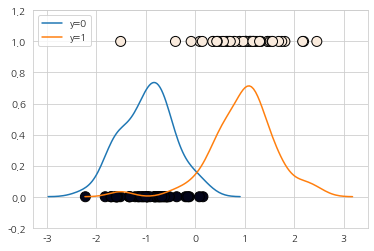

In [3]:
from sklearn.datasets import make_classification
import statsmodels.api as sm
import pandas as pd

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)

X = sm.add_constant(X0)

plt.scatter(X0, y, c=y, s=100, edgecolors='k', lw=1)
sns.distplot(X0[y==0, :], label="y=0", hist=False)
sns.distplot(X0[y==1, :], label="y=1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

StatsModels 패키지는 베르누이 분포를 따르는 로지스틱 회귀 모형 Logit 를 제공한다. 사용방법은 OLS 와 동일하다.

In [4]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 Aug 2019   Pseudo R-squ.:                  0.7679
Time:                        11:46:29   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


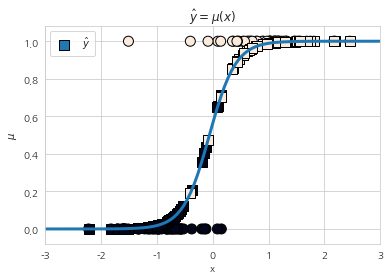

In [10]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))  # 상수항 추가된 형태로 집어 넣어야 함
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolors='k', lw=1)
plt.scatter(X0, logit_res.predict(X), label="$\hat{y}$", marker='s', c=y, s=100, edgecolors='k', lw=1)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel("$\mu$")
plt.title("$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

## 판별함수

#### Logit 모형의 결과 객체에는 fittedvalues라는 속성으로 판별함수  𝑧=𝑤𝑇𝑥  값이 들어가 있다.

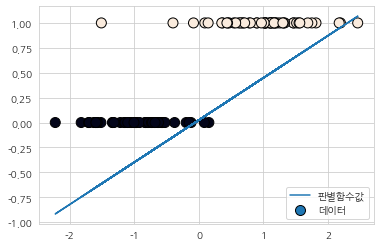

In [13]:
plt.scatter(X0, y, s=100, c=y, edgecolors='k', lw=1, label="데이터")
plt.plot(X0, logit_res.fittedvalues * 0.1, label="판별함수값")
plt.legend()
plt.show()

## 성능 측정

로지스틱 회귀 성능은 McFadden pseudo R square 값으로 측정한다.

$$R^2_{\text{pseudo}} = 1 - \dfrac{G^2}{G^2_0}$$

𝐺2 는 deviance 라고 하는 양으로 다음과 같이 정의된다. 로그 손실(log loss)이라고도 한다.

$$G^2 = 2\sum_{i=1}^N \left( y_i\log\dfrac{y_i}{\hat{y}_i} + (1-y_i)\log\dfrac{1-y_i}{1-\hat{y}_i} \right)$$

여기에서  𝑦̂  는 다음과 같이  𝑦=1 일 확률을 뜻한다.

$$\hat{y}_i = \mu(x_i)$$

#### deviance는 모형이 100% 정확한 경우에는 0이 되고 모형의 성능이 나빠질 수록 값이 커진다.

이 값은 로그 가능도의 음수값과 같다.

$$G^2 = - LL$$

𝐺2 는 현재 deviance이고  𝐺20 는 귀무모형(null model)으로 측정한 deviance이다.

귀무모형이란 모든  𝑥 가  𝑦 를 예측하는데 전혀 영향을 미치지 않는 모형을 말한다. 즉, 무조건부 확률  𝑝(𝑦) 에 따라  𝑥 에 상관없이 동일하게  𝑦 를 예측하는 모형을 말한다.

$$\mu_{\text{null}} = \dfrac{\text{number of $Y=1$ data}}{\text{number of all data}}$$

#### scikit-learn 패키지의 metric 서브패키지에는 로그 손실을 계산하는 log_loss 함수가 있다. normalize=False로 놓으면 위와 같은 값을 구한다. 

#### normalize 인수의 디폴트 값은 True이고 이 때는 로그 손실의 평균값을 출력한다.

위 예제에서 최적 모형의 로그 손실은 약 16이다.

In [14]:
# 1. 최적 모형의 로그손실 구하기 : 현재 로그손실
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y, y_hat, normalize=False)

16.084355200413036

귀무 모형의 모수값을 구하면 0.51이고 이 값으로 로그 손실을 계산하면 약 69이다.

In [15]:
# 2. 귀무모형의 모수값 구하기
mu_null = np.sum(y) / len(y)
mu_null

0.51

In [17]:
# 3. 귀무모형의 모수값을 적용하여 귀모모형 로그손실 계산하기
y_null = np.ones_like(y) * mu_null  # 모두 mu_null 값을 갖는 y size 배열
log_loss(y, y_null, normalize=False)

69.29471672244784

두 값을 이용하여 McFadden pseudo R square 값을 계산할 수 있다.

In [18]:
# 4. McFadden pseudo R square 값 측정
1 - (log_loss(y, y_hat) / log_loss(y, y_null))

0.7678848264170398

## Scikit-Learn 패키지의 로지스틱 회귀

Scikit-Learn 패키지는 로지스틱 회귀 모형 LogisticRegression 를 제공한다.

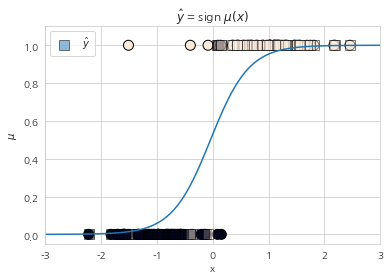

In [29]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
mu = 1.0 / (1 + np.exp(-model_sk.coef_[0][0] * xx - model_sk.intercept_[0]))  # 모형 추정 모수를 적용한 로지스틱함수
plt.plot(xx, mu)  # 로지스틱함수 y 값 분포
plt.scatter(X0, y, c=y, s=100, edgecolors='k', lw=1)
plt.scatter(X0, model_sk.predict(X0), label="$\hat{y}$", marker='s', c=y, s=100, edgecolors='k', lw=1, alpha=0.5)
plt.xlim(-3, 3)
plt.ylim(-0.05, 1.1)
plt.xlabel("x")
plt.ylabel("$\mu$")
plt.title("$\hat{y}$ = sign $\mu(x)$")
plt.legend()
plt.show()

## 로지스틱 회귀를 사용한 이진 분류의 예

다음 데이터는 미국 의대생의 입학관련 데이터이다. 데이터의 의미는 다음과 같다.

+ Acceptance: 0이면 불합격, 1이면 합격
+ BCPM: Bio/Chem/Physics/Math 과목의 학점 평균
+ GPA: 전체과목 학점 평균
+ VR: MCAT Verbal reasoning 과목 점수
+ PS: MCAT Physical sciences 과목 점수
+ WS: MCAT Writing sample 과목 점수
+ BS: MCAT Biological sciences 과목 점수
+ MCAT: MCAT 총점
+ Apps: 의대 지원 횟수

In [30]:
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


일단 학점(GPA)과 합격여부의 관계를 살펴보자.

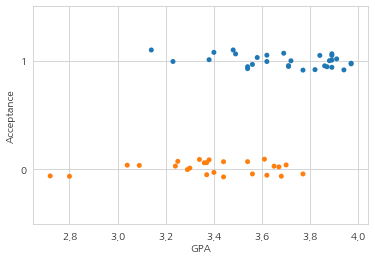

In [35]:
sns.stripplot(x='GPA', y='Acceptance', data=df_med, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

로지스틱 회귀분석을 실시한다. MCAT = VR + PS + WS + BS이므로 이 MCAT은 독립 변수에서 제외해야 한다.

In [37]:
model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", data=df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Sun, 25 Aug 2019   Pseudo R-squ.:                  0.5913
Time:                        12:48:15   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

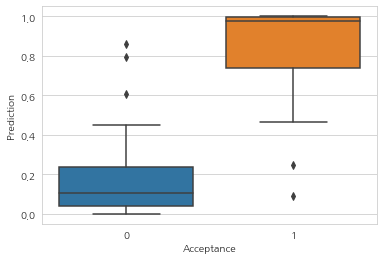

In [38]:
df_med["Prediction"] = result_med.predict(df_med)
sns.boxplot(x="Acceptance", y="Prediction", data=df_med)
plt.show()

### 연습 문제 1

(1) 붓꽃 분류문제에서 클래스가 세토사와 베르시칼라 데이터만 사용하고 (setosa=0, versicolor=1) 독립변수로는 꽃받침 길이(Sepal Length)와 상수항만 사용하여 StatsModels 패키지의 로지스틱 회귀모형으로 결과를 예측하고 보고서를 출력한다. 이 보고서에서 어떤 값이 세토사와 베르시칼라를 구분하는 기준값(threshold)으로 사용되고 있는가?

(2) 위 결과를 분류결과표(confusion matrix)와 분류결과보고서(classification report)로 나타내라.

(3) 이 모형에 대해 ROC커브를 그리고 AUC를 구한다. 이 때 Scikit-Learn의 LogisticRegression을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

In [41]:
from sklearn.datasets import load_iris
iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X = iris.data[idx, :]
y = iris.target[idx]
X.shape, y.shape

((100, 4), (100,))

In [45]:
df_iris = pd.DataFrame(X, columns=iris.feature_names)
df_iris["species"] = y
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [51]:
# 1. 로지스틱 회귀모형 결과 예측
X0 = df_iris["sepal length (cm)"]
y = df_iris["species"]
X = sm.add_constant(X0)
iris_mod = sm.Logit(y, X)
result_iris = iris_mod.fit()
print(result_iris.summary())

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 Aug 2019   Pseudo R-squ.:                  0.5368
Time:                        13:13:12   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal le

꽃받침 길이 5.1403cm를 기준값으로 사용하고 있음 

In [52]:
# 분류결과표(confusion matrix)와 분류결과보고서(classification report)
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
y_hat = result_iris.predict(X)
y_hat[y_hat>0.5] = 1
y_hat[y_hat < 0.5] = 0
confusion_matrix(y, y_hat)

array([[45,  5],
       [ 6, 44]])

In [83]:
print(classification_report(y, y_hat, target_names=[iris.target_names[0], iris.target_names[1]]))

              precision    recall  f1-score   support

      setosa       0.88      0.90      0.89        50
  versicolor       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [85]:
# ROC커브, AUC 구하기
from sklearn.metrics import roc_curve, auc

# 타겟 y값과 판별함수 벡터를 넣고 변화되는 기준값과 그 기준값을 사용했을때 재현율과 위양성률을 반환함
# 따라서 logit 모델의 객체의 fittedvalues 속성인 판별함수 값을 넣어 roc_curve를 구함
fpr, tpr, thresholds = roc_curve(y, result_iris.fittedvalues)
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.02, 0.06, 0.06, 0.1 , 0.2 , 0.22, 0.28, 0.44, 0.6 , 0.68, 0.78,
        0.82, 0.9 , 0.92, 0.98, 1.  ]),
 array([0.  , 0.02, 0.06, 0.12, 0.16, 0.18, 0.22, 0.28, 0.32, 0.48, 0.52,
        0.58, 0.68, 0.78, 0.88, 0.9 , 0.9 , 0.92, 0.94, 0.98, 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  ]),
 array([ 9.15090198,  8.15090198,  7.12283475,  6.60880114,  6.09476752,
         5.58073391,  5.0667003 ,  4.55266668,  4.03863307,  3.01056584,
         2.49653223,  1.98249861,  1.468465  ,  0.95443139,  0.44039777,
        -0.07363584, -0.58766946, -1.10170307, -1.61573668, -2.1297703 ,
        -2.64380391, -3.15783753, -3.67187114, -4.18590475, -4.69993837,
        -5.21397198, -5.72800559]))

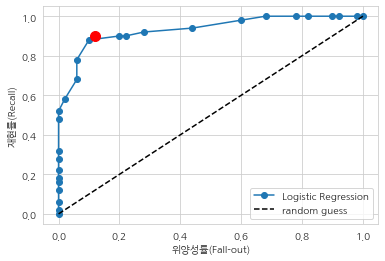

In [87]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel("위양성률(Fall-out)")
plt.ylabel("재현률(Recall)")
plt.legend()
plt.show()

In [88]:
auc(fpr, tpr)

0.9326

AUC가 1에 가까운 값으로 나타나고 있어 좋은 모형이라고 할 수 있다.

### 연습 문제 2

(1) 붓꽃 분류문제에서 클래스가 베르시칼라(versicolor)와 버지니카(virginica) 데이터만 사용하여(versicolor=0, virginica=1) 로지스틱 회귀모형으로 결과를 예측하고 보고서를 출력한다. 독립변수는 모두 사용한다. 이 보고서에서 세토사와 베르시칼라를 구분하는 경계면의 방정식을 찾아라.

(2) 위 결과를 분류결과표와 분류결과보고서로 나타내라.

(3) 이 모형에 대해 ROC커브를 그리고 AUC를 구하라. 이 때 Scikit-Learn의 LogisticRegression을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

In [125]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [128]:
idx = np.in1d(iris.target, [1, 2])
X = iris.data[idx, :]
y = iris.target[idx] - 1 # 1, 2 값을 0, 1로 바꿈

dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=["species"])
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,6.7,3.0,5.2,2.3,1
96,6.3,2.5,5.0,1.9,1
97,6.5,3.0,5.2,2.0,1
98,6.2,3.4,5.4,2.3,1
99,5.9,3.0,5.1,1.8,1


In [129]:
model = sm.Logit(dfy, dfX)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.108399
         Iterations 10


In [130]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Sun, 25 Aug 2019   Pseudo R-squ.:                  0.8436
Time:                        14:37:19   Log-Likelihood:                -10.840
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 3.502e-25
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
sepal length (cm)    -6.3277      2.479     -2.552      0.011     -11.187      -1.468
sepal width (cm)     -6.6182      2.529     -2.616      0.009     -11.576      -1.661
petal length (cm)     8.

In [132]:
# 분류결과표와 분류결과보고서
y_hat = result.predict(dfX)
y_hat[y_hat >= 0.5] = 1
y_hat[y_hat < 0.5] = 0

In [133]:
confusion_matrix(dfy, y_hat)

array([[47,  3],
       [ 2, 48]])

In [134]:
print(classification_report(dfy, y_hat, target_names=[iris.target_names[1], iris.target_names[2]]))

              precision    recall  f1-score   support

  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [135]:
# ROC커브, AUC
fpr, tpr, thresholds = roc_curve(dfy, result.fittedvalues)
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.02, 0.06, 0.06, 0.08, 0.08,
        1.  ]),
 array([0.  , 0.02, 0.28, 0.32, 0.76, 0.76, 0.94, 0.94, 0.98, 0.98, 1.  ,
        1.  ]),
 array([ 16.91235593,  15.91235593,   8.48344054,   7.97934417,
          3.88070404,   3.62903709,   1.16994954,   0.33934392,
         -0.04602122,  -0.4159487 ,  -0.59667563, -13.47443692]))

In [136]:
recall = 47 / (47 + 3)
fallout = 2 / (2 + 48)
recall, fallout

(0.94, 0.04)

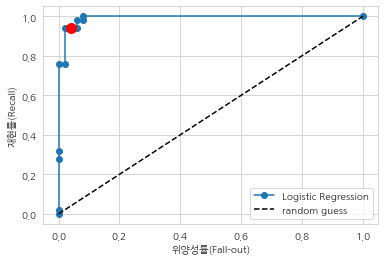

In [137]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel("위양성률(Fall-out)")
plt.ylabel("재현률(Recall)")
plt.legend()
plt.show()

In [138]:
auc(fpr, tpr)

0.9924000000000001

AUC 값이 거의 1에 가까운 값이므로 좋은 모형이라고 할 수 있다. 

## 로지스틱 회귀를 사용한 회귀분석

로지스틱 회귀는 분류문제뿐만 아니라 종속변수  𝑦 가 0부터 1까지 막혀있는 회귀분석 문제에도 사용할 수 있다. 이때는 다음처럼  𝜇  값을 종속변수 y의 예측값으로 사용한다.

$$\hat{y} = \mu(x)$$

#### 만약 실제 y의 범위가 0부터 1이 아니면 스케일링을 통해 바꿔야 한다.

### 예제

다음 데이터는 1974년도에 "여성은 가정을 보살피고 국가를 운영하는 일은 남자에게 맡겨두어야 한다."라는 주장에 대한 찬성, 반대 입장을 조사한 결과이다. 각 열은 다음을 뜻한다.

+ education: 교육 기간
+ sex: 성별
+ agree: 찬성 인원
+ disagree: 반대 인원
+ ratio: 찬성 비율

In [139]:
data_wrole = sm.datasets.get_rdataset("womensrole", package="HSAUR")
df_wrole = data_wrole.data
df_wrole["ratio"] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


교육을 많이 받은 사람일수록 찬성 비율이 감소하는 것을 볼 수 있다.

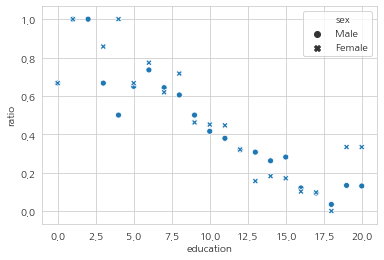

In [140]:
sns.scatterplot(x="education", y="ratio", data=df_wrole, style="sex")
plt.grid(True)
plt.show()

분석 결과는 다음과 같다.

In [141]:
model_wrole = sm.Logit.from_formula("ratio ~ education + sex", data=df_wrole)
result_wrole = model_wrole.fit()
print(result_wrole.summary())

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Sun, 25 Aug 2019   Pseudo R-squ.:                  0.3435
Time:                        15:13:59   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

교육 수준과 찬성 비율이 반비례함을 알 수 있고, 성별은 유의확률이 78%로 귀무가설을 기각할 수 없는 수준이므로 의미가 없다.

성별은 유의하지 않다는 것을 알게되었으므로 성별을 제외하고 다시 모형을 구한다.

In [142]:
model_wrole2 = sm.Logit.from_formula("ratio ~ education", data=df_wrole)
result_wrole2 = model_wrole2.fit()
print(result_wrole2.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 Aug 2019   Pseudo R-squ.:                  0.3422
Time:                        15:17:35   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

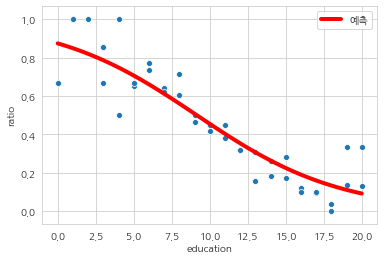

In [143]:
sns.scatterplot(x="education", y="ratio", data=df_wrole)
xx = np.linspace(0, 20, 100)
df_wrole_p = pd.DataFrame({"education": xx})  # x_test
plt.plot(xx, result_wrole2.predict(df_wrole_p), "r-", lw=4, label="예측")
plt.legend()
plt.show()